# Example output from stroke outcome model

In this notebook we provide an example of the output from the stroke outcome model assuming IVT is delivered at 90 mins and MT is delivered at 120 mins after stroke onset.

The model provides a sample distribution of mRS scores for 1,000 patients.

## Load packages and data file

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from outcome_utilities.clinical_outcome import Clinical_outcome

import warnings
warnings.filterwarnings("ignore")

# Load mRS distributions
mrs_dists = pd.read_csv(
    './outcome_utilities/mrs_dist_probs_cumsum.csv', index_col='Stroke type')

## View the loaded mRS distributions
For each stroke type (by row) the culmulative proportion of patients with each mRS score (0-6)

In [2]:
mrs_dists

,0,1,2,3,4,5,6
Stroke type,,,,,,,
pre_stroke_nlvo,0.582881,0.745419,0.848859,0.951082,0.993055,1.000000,1
pre_stroke_nlvo_ivt_deaths,0.576469,0.737219,0.839522,0.940620,0.982131,0.989000,1
pre_stroke_lvo,0.417894,0.560853,0.679283,0.843494,0.957269,1.000000,1
pre_stroke_lvo_ivt_deaths,0.403644,0.541728,0.656119,0.814731,0.924626,0.965900,1
pre_stroke_lvo_mt_deaths,0.402850,0.540662,0.654829,0.813128,0.922807,0.964000,1
no_treatment_nlvo,0.197144,0.460000,0.580032,0.707768,0.855677,0.917702,1
no_effect_nlvo_ivt_deaths,0.197271,0.460000,0.577583,0.702252,0.845244,0.904454,1
t0_treatment_nlvo_ivt,0.429808,0.630000,0.738212,0.848427,0.929188,0.956300,1
no_treatment_lvo,0.050000,0.129000,0.265000,0.429000,0.676000,0.811000,1


## Set up outcome model and get output

In [3]:
# Set up outcome model
outcome_model = Clinical_outcome(mrs_dists, patients=1000)

# Get outputs
time_to_ivt = 90
time_to_mt = 120
outcomes = outcome_model.calculate_outcomes(time_to_ivt, time_to_mt)

## Show raw model output

The model output is a dictionary of results.

In [4]:
outcomes

{'lvo_untreated_probs': array([0.055, 0.078, 0.122, 0.177, 0.251, 0.149, 0.168]),
 'nlvo_untreated_probs': array([0.205, 0.265, 0.125, 0.109, 0.136, 0.078, 0.082]),
 'lvo_ivt_probs': array([0.108, 0.069, 0.127, 0.166, 0.223, 0.133, 0.174]),
 'lvo_mt_probs': array([0.229, 0.128, 0.13 , 0.169, 0.167, 0.072, 0.105]),
 'nlvo_ivt_probs': array([0.366, 0.237, 0.096, 0.098, 0.114, 0.033, 0.056]),
 'lvo_untreated_mean_utility': 0.33151,
 'nlvo_untreated_mean_utility': 0.5968800000000001,
 'lvo_ivt_mean_utility': 0.3700899999999999,
 'lvo_mt_mean_utility': 0.54364,
 'nlvo_ivt_mean_utility': 0.7050500000000001,
 'lvo_ivt_added_utility': 0.03857999999999989,
 'lvo_mt_added_utility': 0.21212999999999999,
 'nlvo_ivt_added_utility': 0.10816999999999999,
 'lvo_untreated_cum_probs': array([0.055, 0.133, 0.255, 0.432, 0.683, 0.832, 1.   ]),
 'nlvo_untreated_cum_probs': array([0.205, 0.47 , 0.595, 0.704, 0.84 , 0.918, 1.   ]),
 'lvo_ivt_cum_probs': array([0.108, 0.177, 0.304, 0.47 , 0.693, 0.826, 1.   ]

## Plot mRS distributions

Define the plotting function

In [5]:
def draw_horizontal_bar(dist,label=' '):
    """
    Draw a stacked horizontal bar chart of the values in 'dist'.
    
    dist  - list or np.array. The probability distribution 
            (non-cumulative).
    label - string. The name printed next to these stacked bars.
    """
    fig = plt.figure(figsize=(8,2))
    ax = fig.add_subplot()
    ax.set_frame_on(False)
    
    colour_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
    # The first bar will start at this point on the x-axis:
    left = 0
    for i in range(len(dist)):
        # Draw a bar starting from 'left', the end of the previous bar,
        # with a width equal to the probability of this mRS:
        ax.barh(' ', width=dist[i], left=left, height=0.5, 
                 label=f'{i}', edgecolor='k', color=colour_list[i%6])
        # Update 'left' with the width of the current bar so that the 
        # next bar drawn will start in the correct place.    
        left += dist[i]
    ax.set_xlabel('Probability')
    ax.set_title(label)
    ax.legend(loc='center',ncol=7, title='mRS', 
               bbox_to_anchor=[0.5,0.0,0.0,-1.20])   # Legend below axis.

Set the plot colour scheme

In [6]:
plt.style.use('seaborn-colorblind')

Plot mRS distribution for untreated LVO.

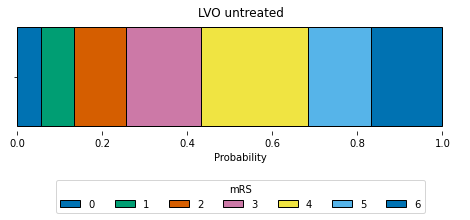

In [7]:
draw_horizontal_bar(outcomes['lvo_untreated_probs'], 'LVO untreated')

Plot mRS distribution for LVO treated with IVT.

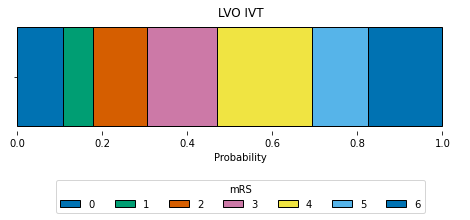

In [8]:
draw_horizontal_bar(outcomes['lvo_ivt_probs'], 'LVO IVT')

Plot mRS distribution for LVO treated with MT.

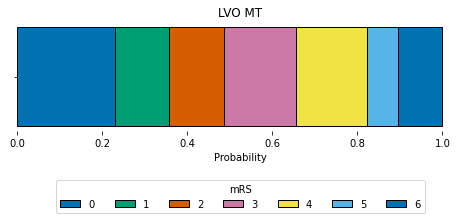

In [9]:
draw_horizontal_bar(outcomes['lvo_mt_probs'], 'LVO MT')

Plot mRS distribution for untreated nLVO.

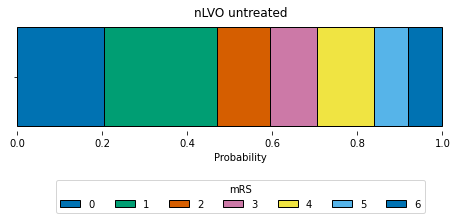

In [10]:
draw_horizontal_bar(outcomes['nlvo_untreated_probs'], 'nLVO untreated')

Plot mRS distribution for nLVO treated with IVT.

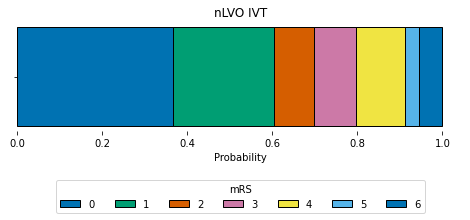

In [11]:
draw_horizontal_bar(outcomes['nlvo_ivt_probs'], 'nLVO IVT')

## Plot changes in mRS proportions with treatment

In [12]:
def plot_shift(dist, label=' '):
    x=np.arange(7)
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot()
    ax.bar(x, dist)
    ax.hlines(0, -0.5, 6.5, color='k', linewidth=1)
    ax.set_xlabel('mRS')
    ax.set_ylabel('Change in probability')
    ax.set_title(label)
    plt.show()

Plot changes in mRS proportions for LVO patients: comparing having no treatment to having IVT

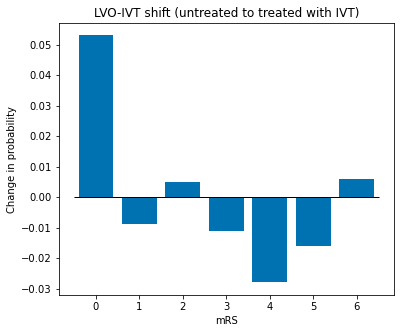

In [13]:
plot_shift(outcomes['lvo_ivt_shift'], 'LVO-IVT shift (untreated to treated with IVT)')

Plot changes in mRS proportions for LVO patients: comparing having no treatment to having MT

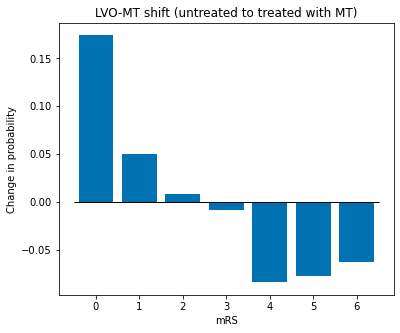

In [14]:
plot_shift(outcomes['lvo_mt_shift'], 'LVO-MT shift (untreated to treated with MT)')

Plot changes in mRS proportions for nLVO patients: comparing having no treatment to having IVT

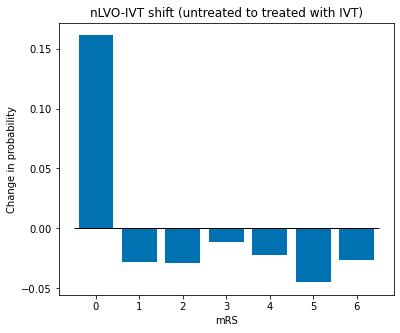

In [15]:
plot_shift(outcomes['nlvo_ivt_shift'], 'nLVO-IVT shift (untreated to treated with IVT)')

## Other stats

### Mean mRS

In [16]:
print('Mean mRS')
print('--------')
print('LVO untreated:', outcomes['lvo_untreated_mean_mRS'])
print('LVO IVT:', outcomes['lvo_ivt_mean_mRS'])
print('LVO MT:', outcomes['lvo_mt_mean_mRS'])
print('nLVO untreated:', outcomes['nlvo_untreated_mean_mRS'])
print('nLVO IVT:', outcomes['nlvo_ivt_mean_mRS'])

Mean mRS
--------
LVO untreated: 3.61
LVO IVT: 3.422
LVO MT: 2.553
nLVO untreated: 2.268
nLVO IVT: 1.68


### Mean shift in mRS

In [17]:
print('Mean mRS shift')
print('--------------')
print('LVO IVT:', outcomes['lvo_ivt_mean_shift'])
print('LVO MT:', outcomes['lvo_mt_mean_shift'])
print('nLVO IVT:', outcomes['nlvo_ivt_mean_shift'])

Mean mRS shift
--------------
LVO IVT: -0.188
LVO MT: -1.049
nLVO IVT: -0.588


### The proportion of patients with improved mRS
Assuming all patients move up the mRS.

In [18]:
print('Proportion improved')
print('-------------------')
print('LVO IVT:', outcomes['lvo_ivt_improved'])
print('LVO MT:', outcomes['lvo_mt_improved'])
print('nLVO IVT:', outcomes['nlvo_ivt_improved'])

Proportion improved
-------------------
LVO IVT: 0.194
LVO MT: 0.832
nLVO IVT: 0.58


### Utility-weighted mRS outcomes

In addition to mRS we may calculate utility-weighted mRS (UW-mRS).

UW-mRS incorporates both treatment effect and patient perceived quality of life as a single outcome measure for stroke trials.

UW-mRS scores are based on a pooled analysis of 20 000+ patients. 
From  Wang X, Moullaali TJ, Li Q, Berge E, Robinson TG, Lindley R, et al.
Utility-Weighted Modified Rankin Scale Scores for the Assessment of Stroke
Outcome. Stroke. 2020 Aug 1;51(8):2411-7.

| mRS Score | 0    | 1    | 2    | 3    | 4    | 5     | 6    |
|-----------|------|------|------|------|------|-------|------|
| Utility   | 0.97 | 0.88 | 0.74 | 0.55 | 0.20 | -0.19 | 0.00 |

In [19]:
x = outcomes['lvo_untreated_mean_utility']
print(f'LVO untreated UW-mRS: {x:0.3f}')

x1 = outcomes['lvo_ivt_mean_utility']
x2 = outcomes['lvo_ivt_added_utility']
print(f'LVO IVT UW-mRS: {x1:0.3f} (added UW-mRS: {x2:0.3f})')

x1 = outcomes['lvo_mt_mean_utility']
x2 = outcomes['lvo_mt_added_utility']
print(f'LVO MT UW-mRS: {x1:0.3f} (added UW-mRS: {x2:0.3f})')

x = outcomes['nlvo_untreated_mean_utility']
print(f'nLVO untreated UW-mRS: {x:0.3f}')

x1 = outcomes['nlvo_ivt_mean_utility']
x2 = outcomes['nlvo_ivt_added_utility']
print(f'nLVO IVT UW-mRS: {x1:0.3f} (added UW-mRS: {x2:0.3f})')



LVO untreated UW-mRS: 0.332
LVO IVT UW-mRS: 0.370 (added UW-mRS: 0.039)
LVO MT UW-mRS: 0.544 (added UW-mRS: 0.212)
nLVO untreated UW-mRS: 0.597
nLVO IVT UW-mRS: 0.705 (added UW-mRS: 0.108)
